In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image
image = cv2.imread("spectrum.jpg")

# Preprocessing image
def preprocess(image):
    blur = cv2.GaussianBlur(image, (5, 5), 0)  #Gaussian blurr
    blur2 = cv2.blur(blur, (5, 5))             #Box filter
    sharp = cv2.subtract(blur, blur2)          #Sharpening
    final = cv2.add(blur, sharp)               #final processed

    return final

In [3]:
# Function to calculate intensity from RGB values
def get_intensity(R, G, B):
    # Standard grayscale conversion formula
    return 0.299 * R + 0.587 * G + 0.114 * B

# Function to get intensity and wavelength data from image
def get_spectrum(image):
    height, width, channels = image.shape
    intensity_list = []
    wavelength_list = []

    for x in range(width):
        R = image[:, x, 2]
        G = image[:, x, 1]
        B = image[:, x, 0]
        column_intensity = get_intensity(R, G, B)
        total_intensity = np.sum(column_intensity)
        intensity_list.append(total_intensity)

        wavelength = 400 + x * (300 / width)
        wavelength_list.append(wavelength)

    return intensity_list, wavelength_list

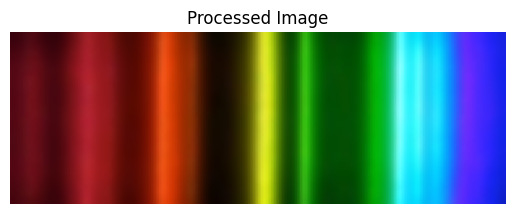

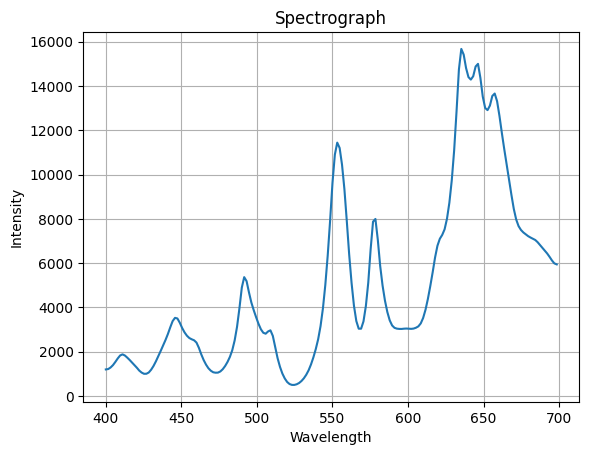

In [5]:
#displaying spectrograph
image = preprocess(image)

#showing image
plt.imshow(image)
plt.title("Processed Image")
plt.axis("off")
plt.show()

#Get wavelength and frequency from data image
intensity, wavelength = get_spectrum(image)

#plotting spectrum
plt.plot(wavelength, intensity)
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.title("Spectrograph")
plt.grid(True)
plt.show()
